In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os # use commandline  
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris (2).csv


In [ ]:
iris.head() #iris.tail()  

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


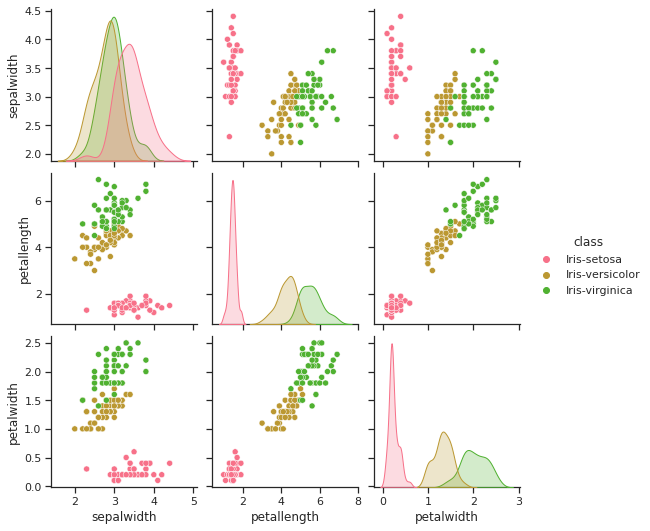

In [ ]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(iris.iloc[:,1:6],hue="class")

In [ ]:
#shape of datasets 
print ("Dataset Shape: ", iris.shape) 
iris.describe()

Dataset Shape:  (150, 5)


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


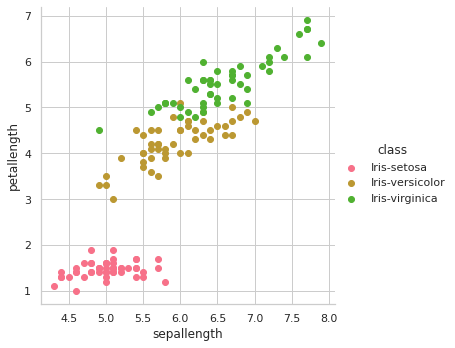

In [ ]:
sns.set_style('whitegrid')
g = sns.FacetGrid(iris, hue = 'class', size = 5)
g.map(plt.scatter,'sepallength','petallength')
g.add_legend()
plt.show()

In [ ]:
# Reading the Iris.csv file
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values # attribute 4 is label data


In [ ]:
# Import Library for splitting data
from collections import Counter
from sklearn.model_selection import train_test_split
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(112, 4) (38, 4) (112,) (38,)
Counter({'Iris-setosa': 39, 'Iris-virginica': 38, 'Iris-versicolor': 35})
Counter({'Iris-versicolor': 15, 'Iris-virginica': 12, 'Iris-setosa': 11})


In [ ]:
# Creating Decision Tree Classifier
# see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))



Train data accuracy: 1.0
Test data accuracy: 0.9473684210526315


In [ ]:
#show confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


In [ ]:
#Measures of the predicted values
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
#use Entropy
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3) #set max_depth = 3
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.9821428571428571
Test data accuracy: 0.9473684210526315


[Text(125.55000000000001, 190.26, 'X[2] <= 2.6\nentropy = 1.583\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.999\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.0\nentropy = 0.406\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

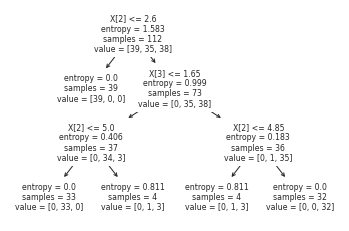

In [ ]:
# Generating the decision tree graph
from sklearn import tree
tree.plot_tree(clf)

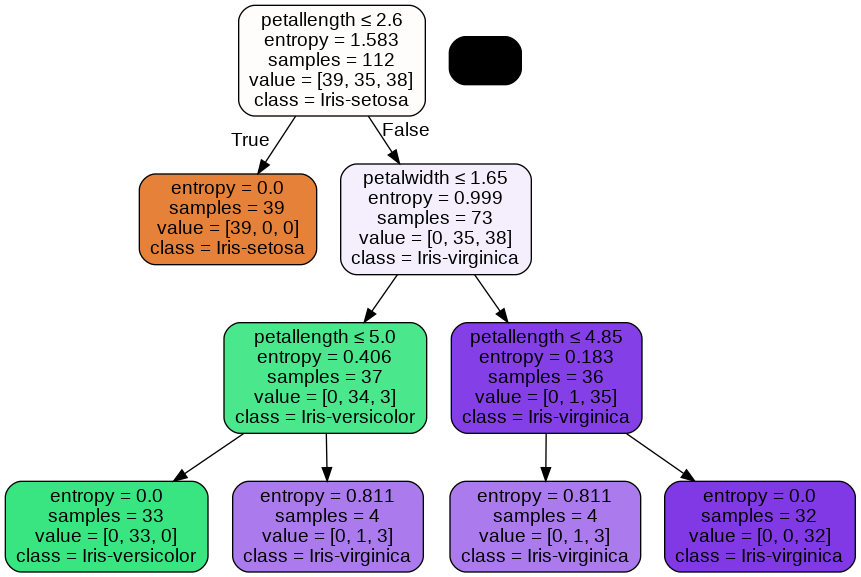

In [ ]:
#Convert decision Tree to Dot file
#export_graphviz function converts decision tree classifier into dot file 
#pydotplus convert this dot file to png or displayable form on Jupyter.
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())
#Values are number of instances per class.


In [ ]:
#the tree can also be exported in textual format with the function export_text.
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0)
decision_tree = clf.fit(X_train,y_train)
rules = export_text(decision_tree, feature_names=feature_cols)
print(rules)

|--- petalwidth <= 0.80
|   |--- class: Iris-setosa
|--- petalwidth >  0.80
|   |--- petalwidth <= 1.65
|   |   |--- petallength <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- petallength >  5.00
|   |   |   |--- sepallength <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- sepallength >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- petalwidth >  1.65
|   |   |--- petallength <= 4.85
|   |   |   |--- sepalwidth <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepalwidth >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petallength >  4.85
|   |   |   |--- class: Iris-virginica



In [ ]:
# prediction on X_test (testing data ) in order to compare actual target with 38 instancs
Y_pred=clf.predict(X_test)
print(Y_pred) 

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


In [ ]:
# prediction on unseen data
X=[[3.2,1.8 ,5.6 ,1.1],[6.4,1.8 ,6.6 ,2.1]]  #two unseen data
Y_pred=clf.predict(X)
print(Y_pred) 

['Iris-versicolor' 'Iris-virginica']


# Exercise 
ให้นักศึกษาทดลองจำแนกชุดข้อมูล bank-data.csv ด้วย decision tree
โดยให้ดำเนินการดังต่อไปนี้
1.  ดูข้อมูลและรายละเอียดของข้อมูลทั้งหมด
2. ลบattribute ที่ไม่จำเป็นออก
3.  จำแนกข้อมูลโดยให้ได้ค่าประสิทธิภาพสูงที่สุดโดยแสดงค่าทั้ง accuracy precision recall f-measure  และสร้าง model
4.  วาดต้นไม้และกฎที่ได้จากการเรียนรู้
5.  ทดลองสร้าง unseen data ขึ้นมาสัก 3 รายการแล้วนำไปจำแนกข้อมูลด้วย model ที่มีค่าสูงที่สุดที่ได้